# AdventureWorks Analysis
From EdX Microsoft DAT 275x course, "Principles of Machine Learning: Python Edition"
## 2. Exploratory Data Analysis and Visualization 

In [52]:
#Load required packages 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline

In [53]:
#Import working file from 1_AW_Data_Prep.ipynb

df_1 = pd.read_csv('working_df.csv')
print(df_1.shape)
df_1.head()

(16471, 13)


,BikeBuyer,Country,Education,Occupation,Gender,MaritalStatus,Home,AveMoSpend,Income,BirthYear,Cars,Child_Home,Child_Total
0,0,Australia,Bachelors,Professional,M,M,1,89,137947,1966,0,0,2
1,1,Australia,Bachelors,Professional,M,S,0,117,101141,1965,1,3,3
2,0,Australia,Bachelors,Professional,M,M,1,123,91945,1965,1,3,3
3,0,Australia,Bachelors,Professional,F,S,0,50,86688,1968,1,0,0
4,1,Australia,Bachelors,Professional,F,S,1,95,92771,1968,4,5,5


### Variable Distributions
#### Categorical Variables

Frequency tables and bar charts allow you to understand the distribution of categorical variables. 

Notes and observations: 
- All features have a manageable number of categories for a machine learning algorithm (not too many). 
- Though there are imbalances in category counts, there are no categories with a particularly small count. 
- The Education category could conceivably be converted to a numeric feature since it could be interpreted as a rank. 

In [54]:
#Frequency tables 

def count_unique(df_1, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(df_1[col].value_counts())

cat_cols = ['BikeBuyer','Country','Education','Occupation','Gender','MaritalStatus','Home']
count_unique(df_1, cat_cols)


For column BikeBuyer
0    10998
1     5473
Name: BikeBuyer, dtype: int64

For column Country
United States     7002
Australia         3194
United Kingdom    1709
France            1591
Germany           1577
Canada            1398
Name: Country, dtype: int64

For column Education
Bachelors              4773
Partial College        4480
High School            2961
Graduate Degree        2857
Partial High School    1400
Name: Education, dtype: int64

For column Occupation
Professional      4957
Skilled Manual    4058
Management        2727
Clerical          2600
Manual            2129
Name: Occupation, dtype: int64

For column Gender
M    8335
F    8136
Name: Gender, dtype: int64

For column MaritalStatus
M    8900
S    7571
Name: MaritalStatus, dtype: int64

For column Home
1    11109
0     5362
Name: Home, dtype: int64


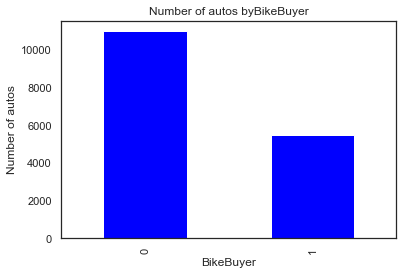

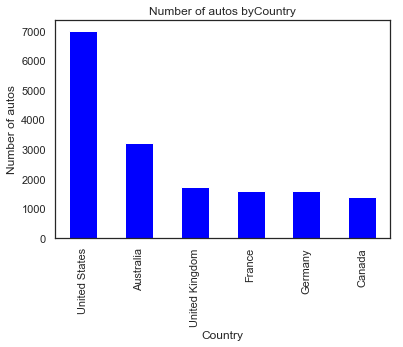

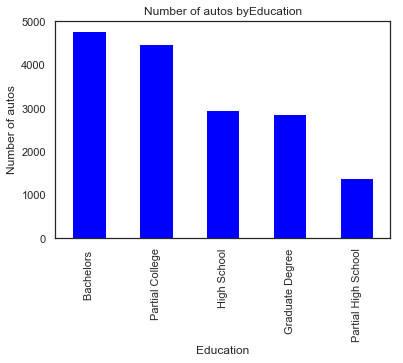

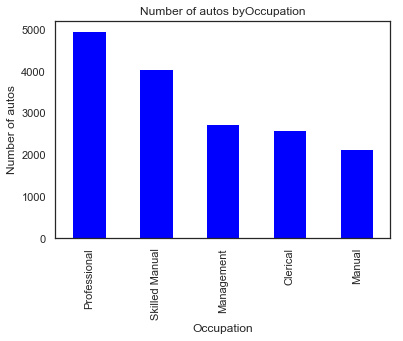

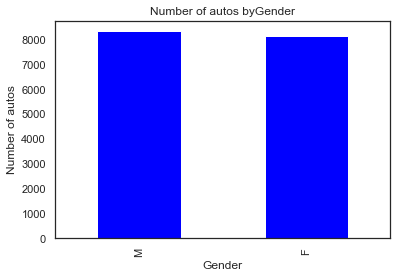

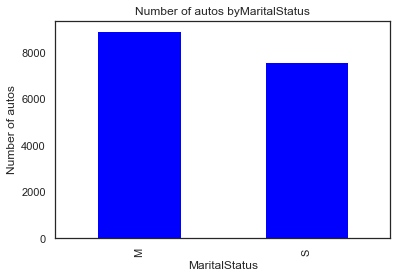

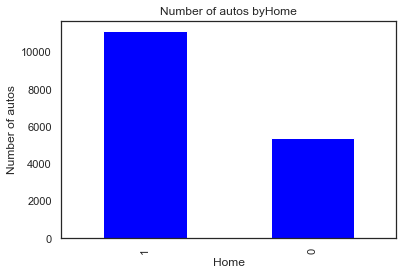

In [55]:
#Bar charts

def plot_bars(df_1, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,4)) # define plot area
        ax = fig.gca() # define axis    
        counts = df_1[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        ax.set_title('Number of autos by' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of autos')# Set text for y axis
        plt.show()

plot_cols = ['BikeBuyer','Country','Education','Occupation','Gender','MaritalStatus','Home']
plot_bars(df_1, plot_cols)  

#### Numeric Variables

Histograms and kernel density plots (kdes for kernel density estimation) allow you to understand the distribution of numeric variables. Kdes are similar to histograms but show a smoothed distibution.

Notes and observations:  
- Right (or negative) skewed distributions include AveMoSpend, the label for the regression exercise, and Income. 
- Left (or positive) skewed distributions include BirthYear.
- Child_Home has one dominant category with approximately 60% of observations being 1 child.  The remaining 40% of observations are fairly equaly spread among 2, 3, 4, and 5 children.


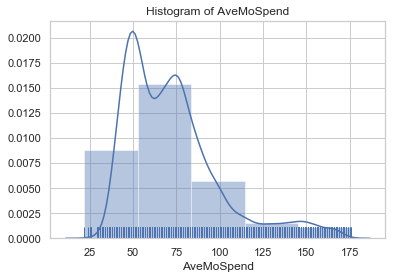

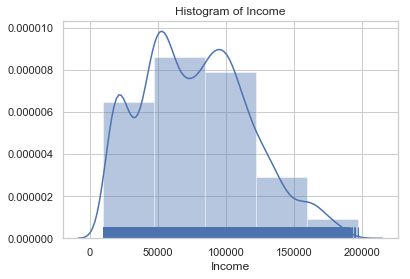

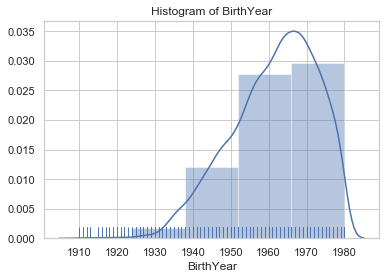

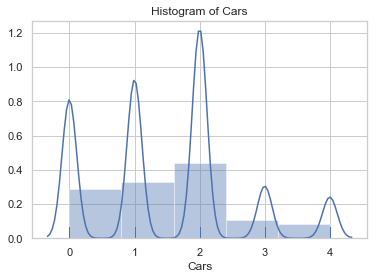

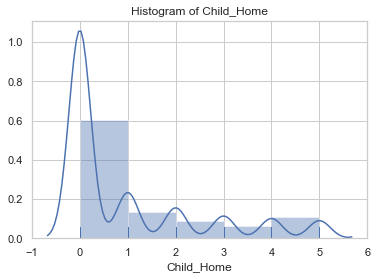

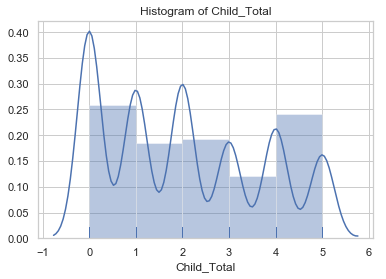

In [56]:
#Combined histograms and kdes

def plot_density_hist(df_1, cols, bins = 5, hist = True):
    for col in cols:
        sns.set_style("whitegrid")
        sns.distplot(df_1[col], bins = bins, rug = True, hist = hist)
        plt.title('Histogram of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.show()
 
num_cols = ['AveMoSpend', 'Income', 'BirthYear', 'Cars', 'Child_Home', 'Child_Total']    
plot_density_hist(df_1, num_cols, bins = 5, hist = True) 

### Correlation

Correlations are helpful in understanding which variables to use as features in a machine learning algorithm. Features that are highly correlated with the label tend to have more predictive power in a model.  

The label for the regression model is AveMoSpend. Correlations between AveMoSpend and other numeric features range from -0.02 to +0.73. Variables in order of strongest to weakest correlations to AveMoSpend are: Child_Home (+0.73), Income (+0.61), Child_Total (+0.50), BikeBuyer (+0.42), Cars (+0.35), Home (+0.13), and BirthYear (-0.02). 

The label for the classification model is BikeBuyer. Correlations between BikeBuyer and other numeric features range from +0.00 to +0.46. Variables in order of strongest to weakest correlations to BikeBuyer are: Child_Home (0.46), AveMoSpend (0.42), Income (0.29), Child_Total (0.23), Cars (0.17), BirthYear (0.14), and Home (0.00).

For both regression and classification, Child_Home, Income, and Child_Total have the highest correlation with the labels. Not surprisingly, Child_Home and Child_Total are highly correlated (+0.65), so it may be best to only include Child_Home, which has the higher correlation for both labels. It should be noted, however, that Child_Home has   one dominant category. Cars, BirthYear, and Home have lower correlations with both labels. 

It is also important to get a sense of the correlation among features, or independent variables, in the model. Highly correlated, or collinear, features make it difficult to separate out the individual impact of each feature on the response. This reduces the accuracy of the regression coefficients. 


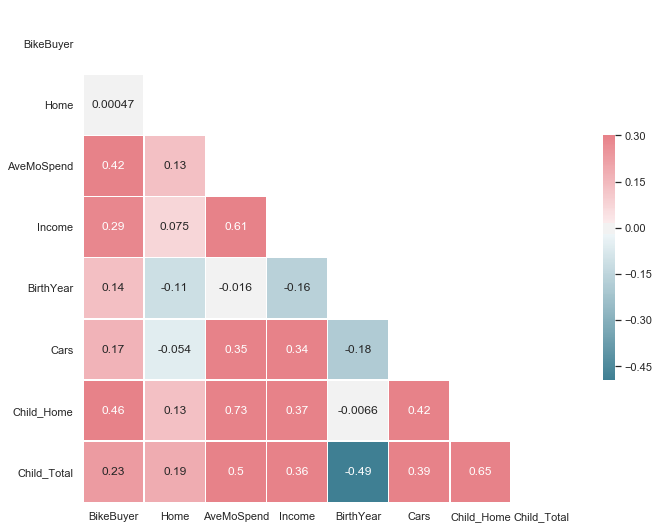

In [57]:
#Correlation matrix with Seaborn 

sns.set(style="white")
corr = df_1.corr() #Generate correlation matrix 
mask = np.zeros_like(corr, dtype=np.bool)  # Generate a mask for the upper triangle
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))  # Set up the matplotlib figure
cmap = sns.diverging_palette(220, 10, as_cmap=True) # Generate a custom diverging colormap


sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, 
            cbar_kws={"shrink": .5},annot=True) # Draw the heatmap with the mask and correct aspect ratio


### Regression 

The regression model will predict customers' monthly spend. We will examine seperately the relationship between AveMoSpend and numeric variables and AveMoSpend and categorical variables. This will help in deciding which variables to include in the model. 

#### Label Versus Numeric Variables 

Two-dimensional plots assist in understanding of the relationship between the regression label and numeric variables. The most basic type of two-dimensional plot is a **scatter plot**. Because of overplotting (high density of points making it difficult to interpret relationships), **hexbin plots** are also included. Hexbin plots are the two-dimensional version of a histogram where the density of the hexagonal cells indicate the density of points. 

Another option similar to hexbin plots are contour or 2d density plots, however these are far more computationally complex and therefore not suitable for large data sets. 

Notes and observations: 
- Many of the scatter plots are difficult to interpret due to a high number of discrete variables and overplotting. Hexbin plots are easier to interpret. 
- There appears to be a loose positive linear relationship between AveMoSpend and both Income and Child_Home. A clustering of two roughly parallel lines that resemble two fingers is also evident in the plot between AveMoSpend and Income.
- A linear relationship is less evident between AveMoSpend and BirthYear, Cars, and Child_Total.


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


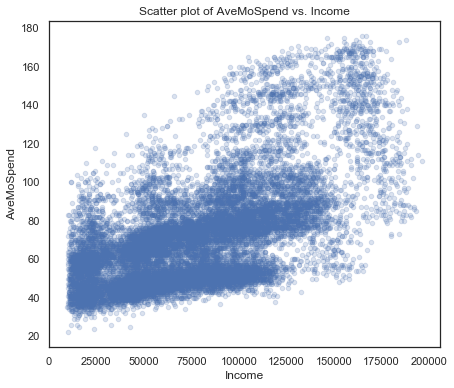

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


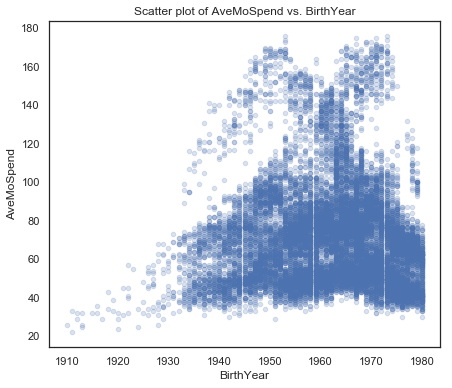

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


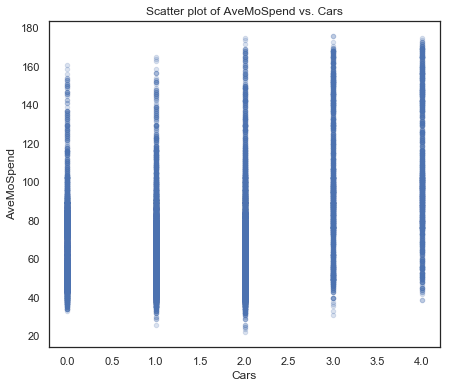

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


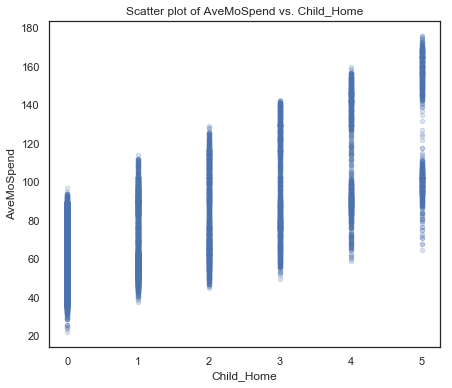

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


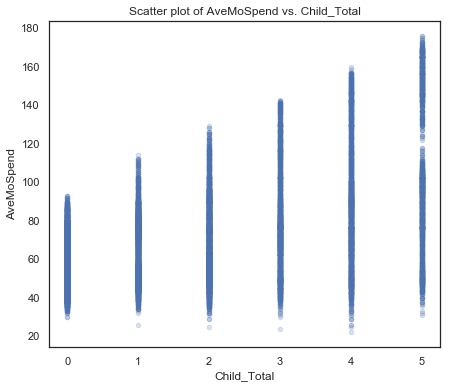

In [58]:
#Scatter plots

def plot_scatter(df_1, cols, col_y = 'AveMoSpend', alpha = 0.2):
    for col in cols:
        fig = plt.figure(figsize=(7,6)) # define plot area
        ax = fig.gca() # define axis   
        df_1.plot.scatter(x = col, y = col_y, ax = ax, alpha = alpha)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y)# Set text for y axis
        plt.show()

num_cols = ['Income','BirthYear','Cars','Child_Home','Child_Total']
plot_scatter(df_1, num_cols, alpha = 0.2)        

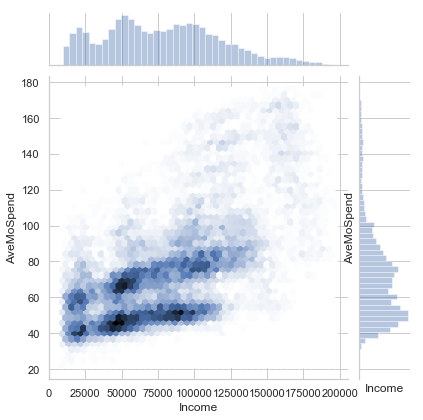

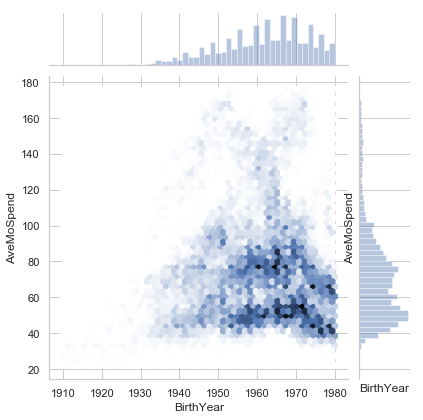

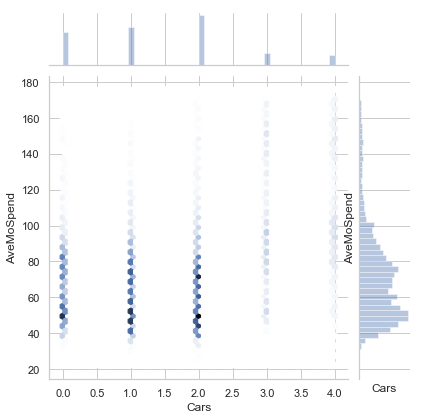

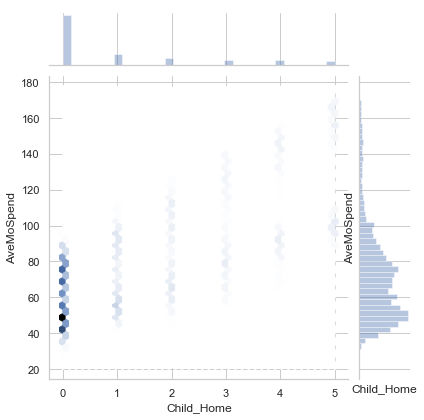

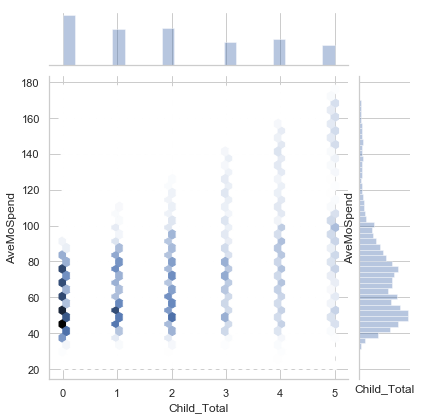

In [59]:
#Hexbin plots

def plot_desity_2d(df_1, cols, col_y = 'AveMoSpend', kind ='hex'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.jointplot(col, col_y, data=df_1, kind=kind)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
plot_desity_2d(df_1, num_cols, kind = 'hex') 

#### Label Versus Categorical Variables  

Box plots and violin plots can be used to examine the relationship between AveMoSpend and categorical variables. The **box plots** show a different plot for each variable's unique categories. The quartiles of their values of AveMoSpend as well as outliers are displayed. **Violin plots** are similar, but include a rotated kernel density plot instead of quartiles and outliers. This provides a more detailed and accurate shape of the distribution.

Notes and observations: 
- Country, Education, and Home show relatively small differences in AveMoSpend quartile values among categories and therefore will likely not be highly predictive. 
- BikeBuyer, Occupation, Gender, and MaritalStatus show more pronounced differences in AveMoSpend quartile values among categories and therefore will likely be more highly predictive.  
- It may be beneficial to combine categories within Occupation as some, such as Professional and Management, are similar. 


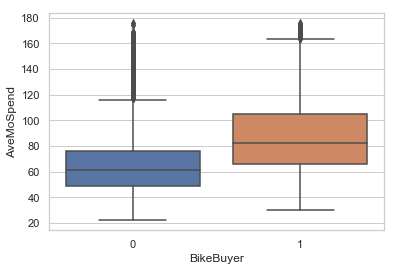

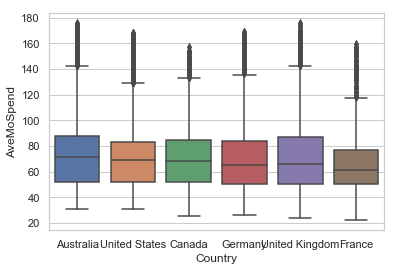

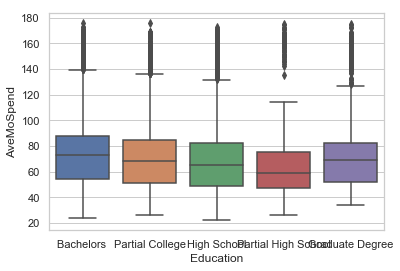

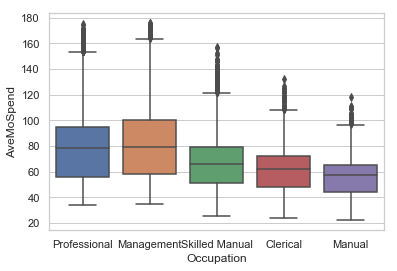

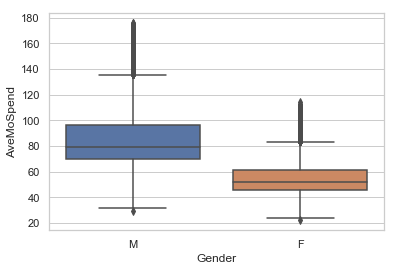

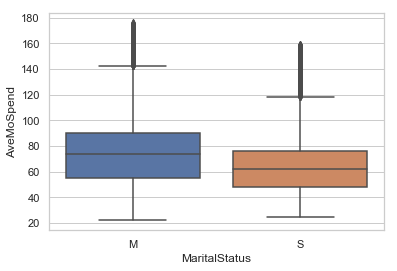

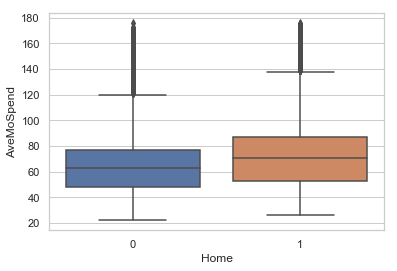

In [34]:
# Box plots 

def plot_box(df_1, cols, col_y = 'AveMoSpend'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data = df_1)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y) # Set text for y axis
        plt.show()

cat_cols = ['BikeBuyer','Country', 'Education', 'Occupation', 'Gender', 'MaritalStatus', 'Home']
plot_box(df_1, cat_cols)

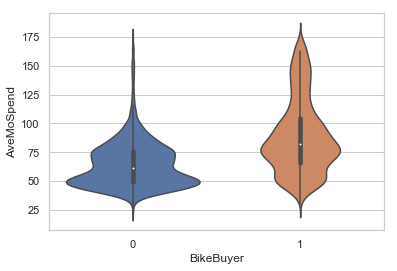

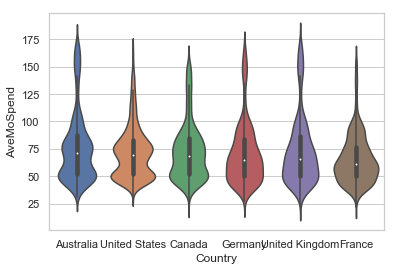

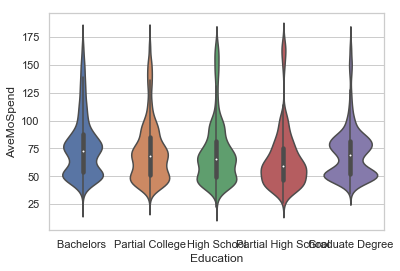

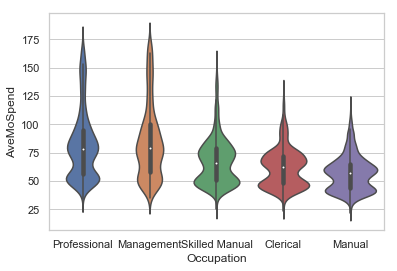

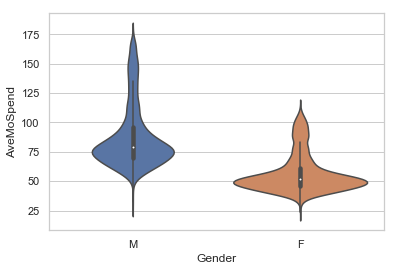

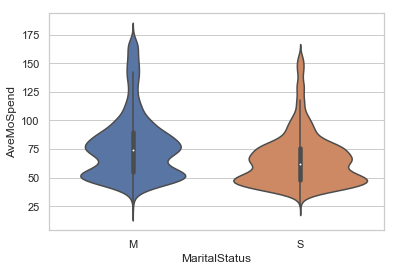

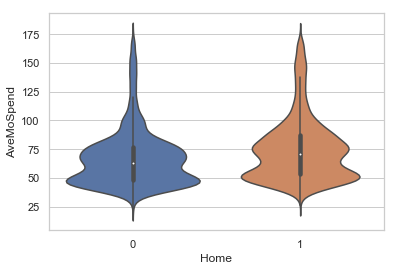

In [35]:
# Violin plots

def plot_violin(df_1, cols, col_y = 'AveMoSpend'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col, col_y, data=df_1)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y) # Set text for y axis
        plt.show()
        
plot_violin(df_1, cat_cols)   

### Classification 

The classification model will predict if a customer will purchase a bike. As with the regression, we will examine seperately the relationship between BikeBuyer and numeric variables and BikeBuyer and categorical variables. This will help determine which variables to include in the model.

#### Class Imbalance 

It is first important to note that the label has a class imbalance, or unequal numbers of cases for label categories. In this case approximately one third of customers buy a bike and two thirds of customers do not buy a bike. Class imbalance can seriously bias the training of classifier algorithms. It many cases, this imbalance leads to a higher error rate for the minority class.

In [36]:
buyer_counts = df_1['BikeBuyer'].value_counts()
print(buyer_counts)

0    10998
1     5473
Name: BikeBuyer, dtype: int64


In [37]:
round(5473/(10998+5473),3)

0.332

#### Label Versus Numeric Variables

As with the regression, we can examine the relationship between categorical and numeric variables with box and violin plots. In this case the axes are switched with the label on the x-axis and the independent variables on the y-axis. 

Notes and observations: 
- There appear to be pronounced differences between bike buyers and non bike buyers for all numeric features. Therefore all  are likely to be predictive.  

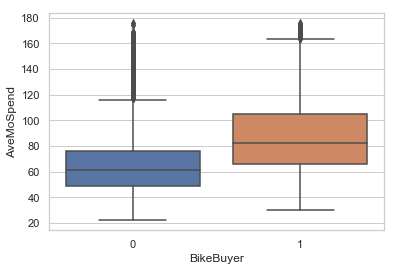

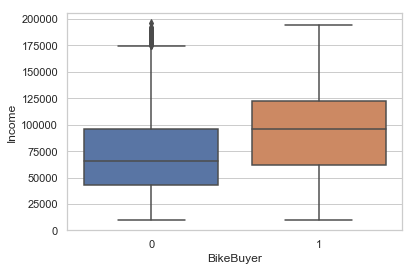

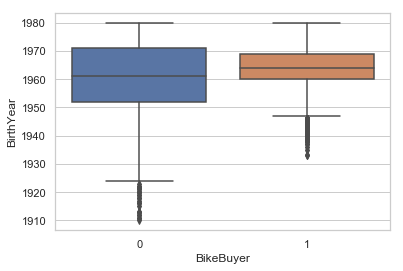

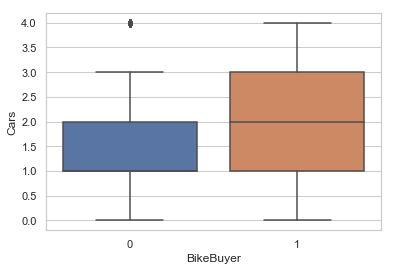

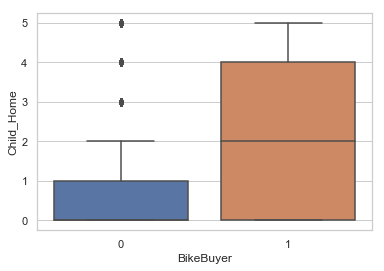

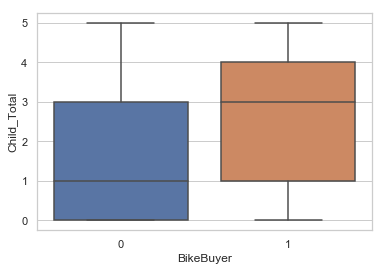

In [60]:
#Box plots 

def plot_box(df_1, cols, col_x = 'BikeBuyer'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data = df_1)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col) # Set text for y axis
        plt.show()

num_cols = ['AveMoSpend', 'Income', 'BirthYear', 'Cars', 'Child_Home', 'Child_Total']
plot_box(df_1, num_cols)

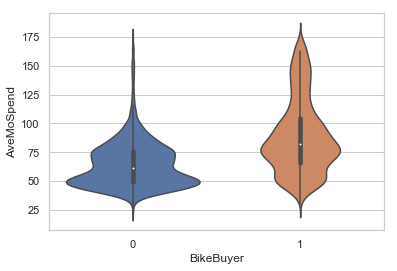

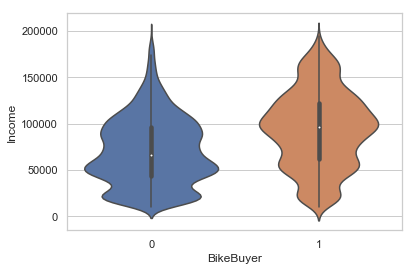

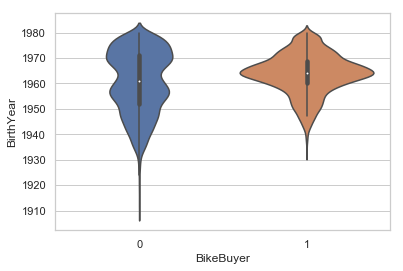

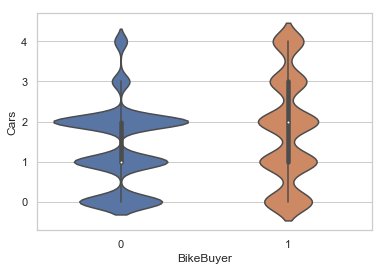

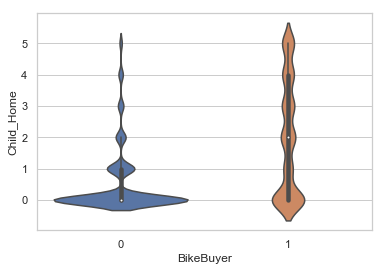

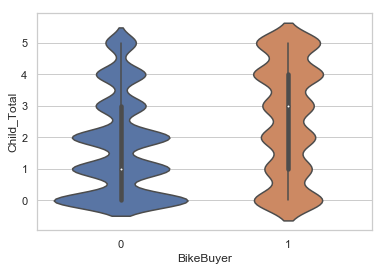

In [61]:
#Violin plots 

def plot_violin(df_1, cols, col_x = 'BikeBuyer'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col_x, col, data = df_1)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()

plot_violin(df_1, num_cols)

#### Label Versus Categorical Variables

Side by side bar plots can be used to visualize the the ability of categorical features to separate bike buyers from non bike buyers. Categorical features that will be most useful are those with a distinct proportion of the categories for each of the label values. It is important to focus on proportions rather than values due to the class imbalance of the label.

Notes and observations:  
- There are significant differences in the proportion of categories between label values for: Occupation, Gender, and MaritalStatus. These are likely to be good predictors.
- There are less significant differences in the proportion of categories between label values for: Country, Education, and Home. These are unlikely to be good predictors. 

Country


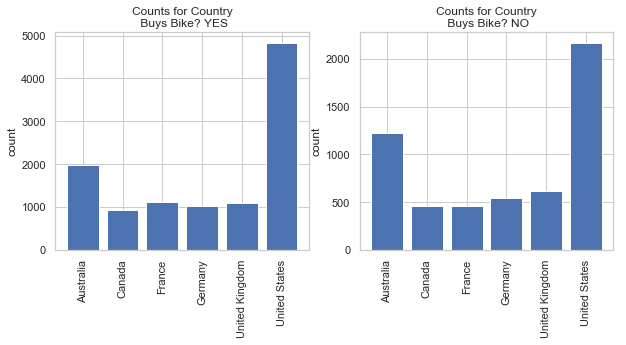

Education


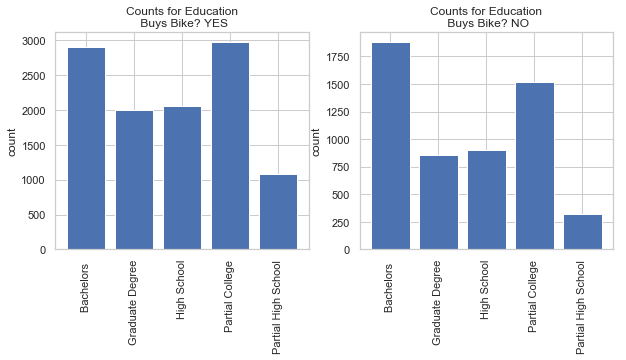

Occupation


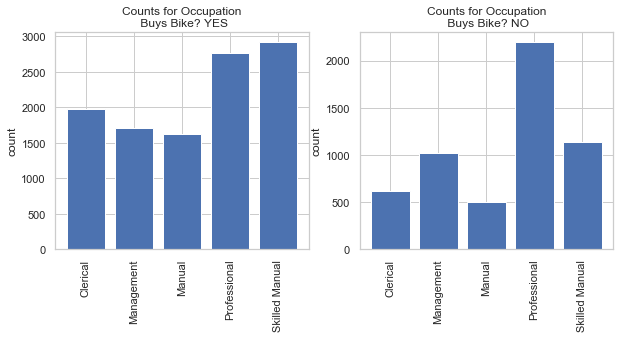

Gender


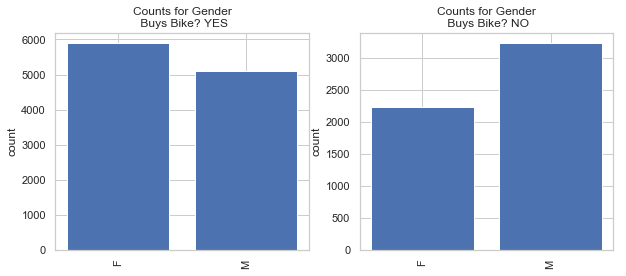

MaritalStatus


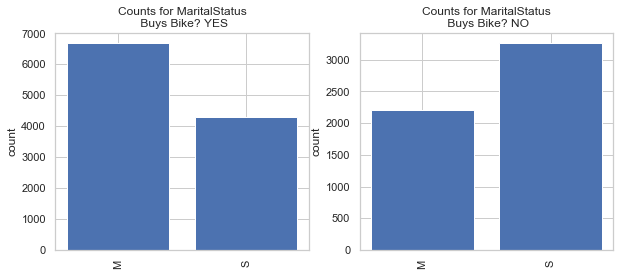

Home


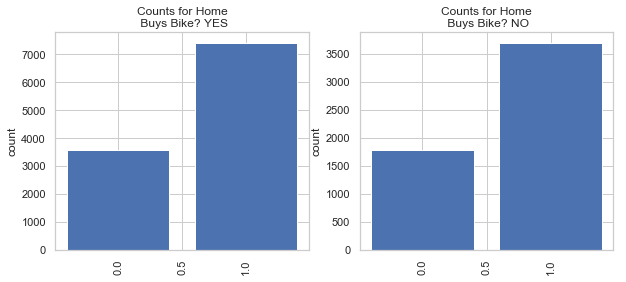

In [63]:
#Side by side bar plots

cat_cols = ['Country', 'Education', 'Occupation', 'Gender', 
                  'MaritalStatus', 'Home']

df_1['dummy'] = np.ones(shape = df_1.shape[0])
for col in cat_cols:
    print(col)
    counts = df_1[['dummy', 'BikeBuyer', col]].groupby(['BikeBuyer', col], as_index = False).count()
    temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
    _ = plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Buys Bike? YES')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    temp = counts[counts['BikeBuyer'] == 1][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n Buys Bike? NO')
    plt.ylabel('count')
    plt.show()